In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split



In [4]:
def balance_classes(X_train, y_train):
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_train, y_train)
    print(f"Original training class distribution:\n{y_train.value_counts()}")
    print(f"Balanced training class distribution:\n{pd.Series(y_res).value_counts()}")

    # Convert to DataFrame and reset index to avoid NaNs
    X_res_df = pd.DataFrame(X_res, columns=X_train.columns).reset_index(drop=True)
    y_res_df = pd.Series(y_res, name='LUNG_CANCER').reset_index(drop=True)
    return X_res_df, y_res_df

def normalize_data(X_train, X_test, numeric_cols=None):
    if numeric_cols is None:
        numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
    scaler = MinMaxScaler()
    X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
    X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
    return X_train, X_test



In [5]:
# Load dataset
df_original = pd.read_csv('../results/outputs/engineered_features_data.csv')  
print("Original dataset head:\n", df_original.head())


Original dataset head:
    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       0   69        1               0        0              1   
1       0   71        1               1        0              0   
2       0   61        1               0        0              1   
3       0   55        1               1        0              1   
4       1   56        1               0        0              0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ...  Risk_Score  \
0                0         1         0         0  ...         3.5   
1                1         0         1         1  ...         3.0   
2                1         0         1         1  ...         3.0   
3                0         0         0         1  ...         3.5   
4                0         1         1         1  ...         3.5   

   Age_Smoking_Interaction  Chronic_Health_Score  Symptom_Severity  \
0                       69                     1                 2   
1                 

C:\Users\User\AppData\Local\Temp\ipykernel_38784\2266708348.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LUNG_CANCER', data=df_original, palette=['#FF9999', '#66B2FF'])


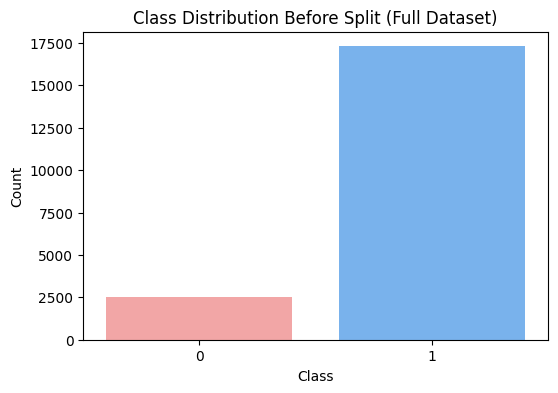

In [6]:
# Class distribution before split (full dataset for reference)
plt.figure(figsize=(6, 4))
sns.countplot(x='LUNG_CANCER', data=df_original, palette=['#FF9999', '#66B2FF'])
plt.title('Class Distribution Before Split (Full Dataset)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.savefig('../results/eda_visualizations/IT24101466/class_distribution_before_full.png')
plt.show()



In [ ]:
# Excluding target
numeric_cols = df_original.select_dtypes(include=['int64', 'float64']).columns.drop('LUNG_CANCER')


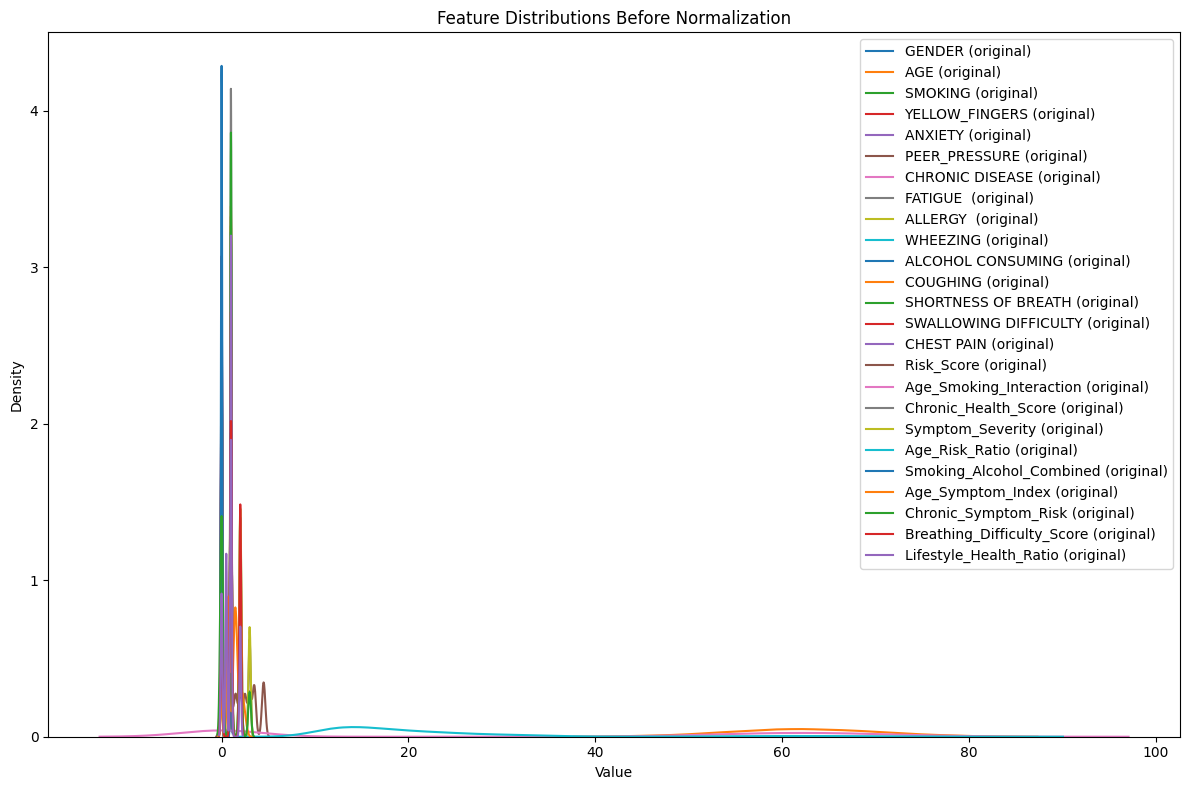

In [7]:
# KDE plots before normalization
plt.figure(figsize=(12, 8))
for col in numeric_cols:
    sns.kdeplot(df_original[col], label=f'{col} (original)', linewidth=1.5)
plt.title('Feature Distributions Before Normalization')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig('../results/eda_visualizations/IT24101466/kde_before_normalization.png')
plt.show()



In [8]:
# Separate features and target
X = df_original.drop(columns=['LUNG_CANCER'])
y = df_original['LUNG_CANCER']

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



C:\Users\User\AppData\Local\Temp\ipykernel_38784\1768481339.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LUNG_CANCER', data=test_before_df, palette=['#FF9999', '#66B2FF'])


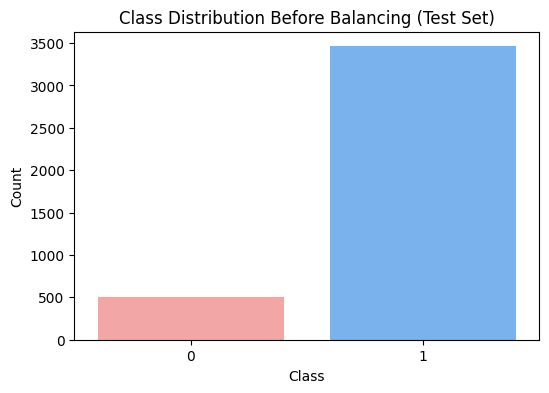

In [9]:
# Class distribution before balancing (test set)
test_before_df = pd.concat([X_test, y_test], axis=1)
plt.figure(figsize=(6, 4))
sns.countplot(x='LUNG_CANCER', data=test_before_df, palette=['#FF9999', '#66B2FF'])
plt.title('Class Distribution Before Balancing (Test Set)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.savefig('../results/eda_visualizations/IT24101466/class_distribution_before_test.png')
plt.show()



Original training class distribution:
LUNG_CANCER
1    13839
0     2038
Name: count, dtype: int64
Balanced training class distribution:
LUNG_CANCER
1    13839
0    13839
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_38784\2567155576.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LUNG_CANCER', data=train_balanced_df, palette=['#FF9999', '#66B2FF'])


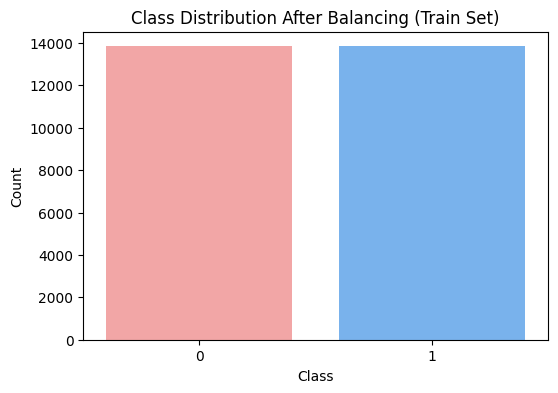

In [10]:
# Apply SMOTE only on training set
X_train_res, y_train_res = balance_classes(X_train, y_train)

# Class distribution after balancing
train_balanced_df = pd.concat([X_train_res, y_train_res], axis=1)
plt.figure(figsize=(6, 4))
sns.countplot(x='LUNG_CANCER', data=train_balanced_df, palette=['#FF9999', '#66B2FF'])
plt.title('Class Distribution After Balancing (Train Set)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.savefig('../results/eda_visualizations/IT24101466/class_distribution_train_balanced.png')
plt.show()



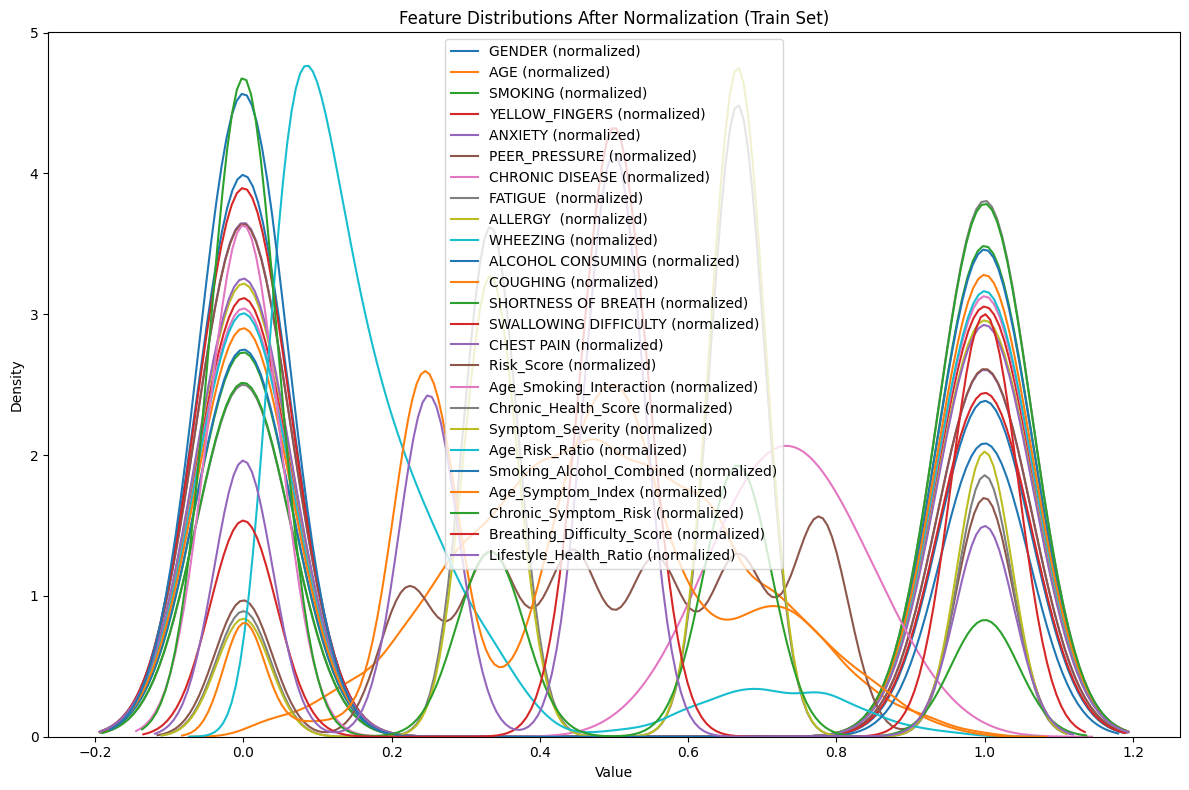

In [11]:
# Normalize numeric features
X_train_norm, X_test_norm = normalize_data(X_train_res, X_test)

# KDE plots after normalization (train set)
train_norm_df = pd.concat([X_train_norm, y_train_res], axis=1)
plt.figure(figsize=(12, 8))
for col in numeric_cols:
    sns.kdeplot(X_train_norm[col], label=f'{col} (normalized)', linewidth=1.5)
plt.title('Feature Distributions After Normalization (Train Set)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig('../results/eda_visualizations/IT24101466/kde_after_normalization.png')
plt.show()



In [12]:
# Combine test set for saving
test_df = pd.concat([X_test_norm.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

# Save processed datasets
train_norm_df.to_csv('../results/outputs/train_balanced_normalized.csv', index=False)
test_df.to_csv('../results/outputs/test_normalized.csv', index=False)
print("Saved train and test datasets to '../results/outputs/'")

Saved train and test datasets to '../results/outputs/'
